In [18]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [19]:
# disjoint-set node
    def __init__(self):
        self.rank = 0
        self.parent = self

    # DisjointSets Constructors and public methods.
    def __init__(self):
        self._sets = defaultdict(DsNode)

    def find(self, x):
        # path compression
        while x.parent is not x:
            x.parent = x.parent.parent
            x = x.parent
        return x

    def findByLabel(self, label):
        return self.find(self._sets[label])

    def unionByLabel(self, labelA, labelB):
        # union by rank
        a, b = self.find(self._sets[labelA]), self.find(self._sets[labelB])
        if a is not b:
            if a.rank > b.rank:
                b.parent = a
            else:
                a.parent = b
                if a.rank == b.rank:
                    b.rank += 1

# Connected-component labeling algorithm

    def solve(self, board):
        """
        :type board: List[List[str]]
        :rtype: void Do not return anything, modify board in-place instead.
        """
        rows = len(board)
        if rows > 2:
            cols = len(board[0])
            if cols > 2:
                ds = DisjointSets()
                dummy = rows * cols
                max_row_index, max_col_index = rows - 1, cols - 1
                labels, next_label = [[0] * cols for _ in range(rows)], 1
                # connect 'O's in 1st column to dummy node
                for row in xrange(rows):
                    if board[row][0] == 'O':
                        labels[row][0] = dummy
                # connect 'O's in 1st row to dummy node
                for col in xrange(1, cols):
                    if board[0][col] == 'O':
                        labels[0][col] = dummy

                for row in xrange(1, rows):
                    for col in xrange(1, cols):
                        if board[row][col] == 'O':
                            # check north and west cells
                            north, west = row - 1, col - 1
                            if board[north][col] == 'O':
                                # use the label of north cell
                                labels[row][col] = labels[north][col]
                            if board[row][west] == 'O':
                                if labels[row][col] == 0:
                                    # current cell not labeled, use the label of west cell
                                    labels[row][col] = labels[row][west]
                                elif labels[row][col] != labels[row][west]:
                                    # union the two labels of north and west cells
                                    ds.unionByLabel(labels[row][col], labels[row][west])
                            if labels[row][col] == 0:
                                # current cell not labeled: must be an isolated cell. Use next label
                                labels[row][col] = next_label
                                next_label += 1
                            if row == max_row_index or col == max_col_index:
                                # union boundary cells with dummy node 
                                ds.unionByLabel(dummy, labels[row][col])

                dummy = ds.findByLabel(dummy)
                # scan board, check whether an 'O' cell is connected to dummy node
                for row in xrange(1, max_row_index):
                    for col in xrange(1, max_col_index):
                        if board[row][col] == 'O' and ds.findByLabel(labels[row][col]) is not dummy:
                            # capture cell if it is not connected to dummy node
                            board[row][col] = 'X'

IndentationError: unexpected indent (<ipython-input-19-d416d61e8d83>, line 2)

In [20]:
im = Image.open("sunset.jpg")
width=100
height=100
im2 = im.resize((width, height), Image.NEAREST)
im_array=np.array(im2)

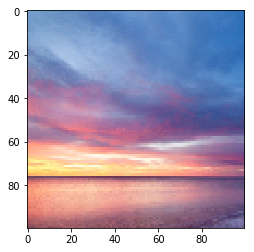

In [21]:
plt.imshow(im_array)

In [22]:
#calling connected component labeling 
solve(im_array)

NameError: name 'solve' is not defined